# Botnet Detection in IoT Environment





# Abstract

The goal of this project is to use classification models for botnet detection in IoT environment in order to improve the IoT network security. In addtion, leveraging categorical feature engineering along with a supervised learning algorithms, logistic Regression, Decision Tree and Random Forest to achieve promising results for this problem. 

BoT-IoT dataset is going to be used in this project. The BoT-IoT dataset was created by designing a realistic network environment in the Cyber Range Lab of UNSW Canberra. The network environment incorporated a combination of normal and botnet traffic. Further information can be found at https://research.unsw.edu.au/projects/bot-iot-dataset 

Such this model can be integrated with current IoT network detection solutions in order to improve their accuracy to mitigate the threats.

# Design

As such a project and precisely botnet detection in IoT environment, it requires a dataset containing enough information about IoT traces. BoT-IoT dataset was created in the lab of UNSW Canberra cyber center. This dataset collaborates the normal and botnet traffic with labels. The researcher creates many virtual machines on an internal network to simulate different malicious attacks with the intention to capture normal and malicious traffic as shown in the figure below.

<img src="images/Design.PNG" alt="Drawing" style="width: 600px;"/>



# Description of the Dataset
More than 72 million records were captured to create BoT-IoT dataset. The dataset includes traffic from different malicious attacks. The major contrast in this dataset is that it contains more than 99% of botnet traffic while less than 1% normal traffic. In spite of that, 81789 records were taken as balanced sample of the whole data to do the experiments and build the models. In this study, 15 features were selected including the target.

### Selected features:

| Feature| Description|
| --- | --- |
| dur | Record total duration |
| spkts | Source-to-destination packet count |
| dpkts | Destination-to-source packet count |
| Sbytes | Source-to-destination byte count |
| Dbytes | Destination-to-source byte count |
| rate | Total packets per second in transaction |
| sttl | Source to destination time to live value |
| dttl | Destination to source time to live value |
| sload | Source bits per second |
| dload | Destination bits per second |
| sinpkt | Source interpacket arrival time (mSec) |
| dinpkt | Destination interpacket arrival time (mSec) |
| sjit | Source jitter (mSec) |
| djit | Destination jitter (mSec) |
| label | Class label: 0 for Normal traffic, 1 for Attack Traffic |



# Model Selection and Evaluation 

##  A- Models Selection

In this project, I will implement a three machine learning methods:

- Logistic Regression
- Decision Trees
- Random Forest

Feature importance ranking will be considered in this project.


##  B- Models Evaluation

I will evaluate these three models by calculating accuracy, precision, recall, and f1score after training and testing them as following:

### Step 1: Importing Libraries

In this project, I will used many important libraries such as:
- Numpy and Pandas for data manipulation
- Scikit-learn for modeling
- Matplotlib and Seaborn for plotting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot


### Step 2: Importing the dataset

After importing needed Libraries, I will import the dataset using the following:

In [3]:
Traffic_Data = pd.read_csv('Dataset/IoT-Bot.csv')

### Step 3: Feature Engineering

Then, I will do some feature engineering processes:

1- Clean the data by dropping features that consist of frequent missing or unuseful data such as time and source/destination address...etc.

2- Converting categorical features to binary dummy variables as needed.



### Look at the first 5 rows

In [4]:
Traffic_Data.shape

(81789, 15)

In [5]:
Traffic_Data.head(n=5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,11.830604,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,1387.778330,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,11420.926230,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,4991.784669,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,115.807000,0


### Check if there are Null values


In [6]:
Traffic_Data.isnull().sum()

dur       0
spkts     0
dpkts     0
sbytes    0
dbytes    0
rate      0
sttl      0
dttl      0
sload     0
dload     0
sinpkt    0
dinpkt    0
sjit      0
djit      0
label     0
dtype: int64

### Step 4 : Split Data into Train & Test Data

At this stage, I will do splitting the data into two datasets (Training & Testing Datasets).

Example: X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size= ...)

### Insert X and y values

In [7]:
X = Traffic_Data[['dur','spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit']]
y = Traffic_Data['label']

### Split training and testing data
It is important to split `X` and `y` as training set and testing set. Here, we will split the original data as 80% training set and 20% testing set.

In [8]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

# Train ML Models

I will train three different models with datasets mentioned earlier and do some measurements such as (accuracy, precision, recall and fscore) to see how efficient are these three models with the project's dataset.

These three models are as following:

## Model 1: Logistic Regression

In [9]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1))

accuracy: 0.8493703386722093
precision: 0.7758785332314744
recall: 0.9858044164037855
fscore: 0.8683338676926365


## Model 2: DecisionTree

[2.26484775e-02 6.31940650e-03 3.16067076e-03 7.16842376e-02
 8.84201039e-02 1.80693415e-02 6.14109431e-01 5.85703360e-05
 2.00353500e-02 2.50723407e-02 2.65178489e-02 3.01847084e-02
 3.80266833e-02 3.56928295e-02]


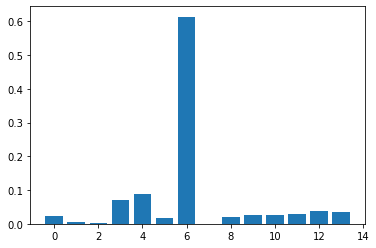

accuracy: 0.9018217385988507
precision: 0.9031314731326916
recall: 0.9013741943329685
fscore: 0.9022519780888618


In [8]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(model.feature_importances_)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1))


## Model 3: RandomForest

[0.05593426 0.01528982 0.01321226 0.0653394  0.04236491 0.08382209
 0.20251238 0.15789597 0.04370057 0.05160221 0.04825457 0.09609836
 0.08181644 0.04215678]


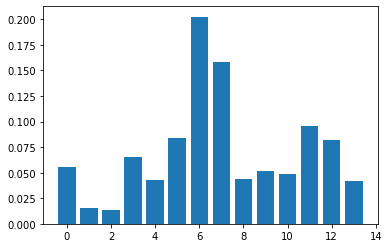

accuracy: 0.9160044015160778
precision: 0.8953018584785871
recall: 0.9432080749118327
fscore: 0.9186308184294683


In [9]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(model.feature_importances_)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1))


# Conclusion

From our experiments, we concluded that both the DecisionTree and RandomForest are the most accurate algorithms for predicting the Botnet type of traffic.

Nonetheless, the DecisionTree puts high weight only on one feature which is (sttl) for its prediction compared to the RandomForest which considers most of the selected features . Therefore, I will select the RandomForest algorithm to be the most accurate one among all.